# Perspective Transformation

In [1]:


import cv2
import matplotlib.pyplot as plt
import numpy as np

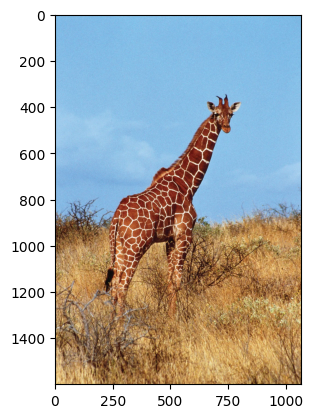

In [2]:


image = cv2.imread("giraffe-Kenya.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)


In [3]:
image_rgb.shape

(1600, 1067, 3)

#### steps to solve any kind of transformation:-
--> set the rows,cols for the image taken as input

--> set the input and output points. 3 points for affine transformation and 4 points for perspective transformation

--> using the cv.getTransfornmPerspective()/ Affine() find the matrix M

--> Then use cv2.warpPerspective/Affine() to find the actual image and plot it according to you convinence

M Matrix:
[[ 1.02287821e+00  6.29847356e-02 -4.42634568e+01]
 [-5.02940991e-02  1.04090741e+00  5.07662367e+01]
 [ 3.13145264e-05  2.80659423e-05  1.00000000e+00]]


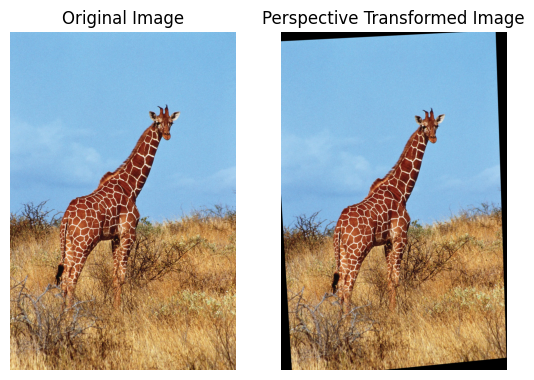

In [ ]:
'''
Trasformation matrix for Perspective trasformation

3x3

a, b, c
d, e, f
g, h, 1

a,b,c is responsioble for horizontal scaling, rotation and tranlation
d,e,f is responsioble for vertical scaling, rotation and tranlation
g,h  : Perspective components that account for depth and skew

'''
rows, cols,_ = image_rgb.shape

input_points = np.float32([[50, 50], [cols - 50, 50], [50, rows-50], [cols-50, rows-50]])
output_points = np.float32([[10, 100], [cols - 100, 50], [100, rows-10], [cols-50, rows-100]])

M = cv2.getPerspectiveTransform(input_points,output_points)
print("M Matrix:")
print(M)

perspective_image = cv2.warpPerspective(image_rgb,M,(cols,rows))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("Perspective Transformed Image")
plt.axis("off")

plt.show()

# Affine transformation

Matrix M is:
[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

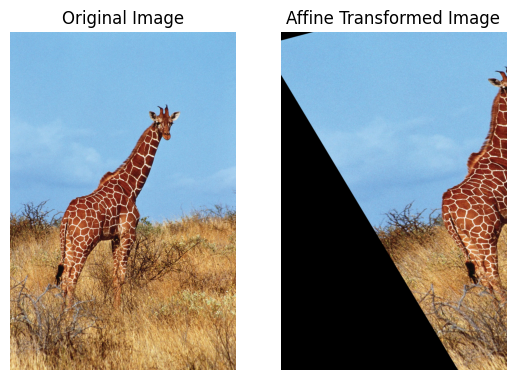

In [12]:
rows, cols,_ = image_rgb.shape
input_points = np.float32([[50,50], [200, 50], [50, 200]])
output_points = np.float32([[10,100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(input_points, output_points)
print("Matrix M is:")
print(M)

affine_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")


#### Rotation, Translation, scaling, shearing all this can be done using Affine transformation.

We will create our own matrix for this transformation as we have the matrix knowledge abouut it. So we are not going to generate any kind of matrix form here.

for affine the matrix is -->

[a b tx

c d ty]

Now for scaling  --> c = b = tx = ty = 0,  set a and d

for rotation --> a = cos@, b=-sin@, c=sin@, d = cos@

for translation --> tx = ty = set values, remaing will be 0

for shearing --> b and c not equal to 0, a=d=1, tx=ty=0

# Rotation

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

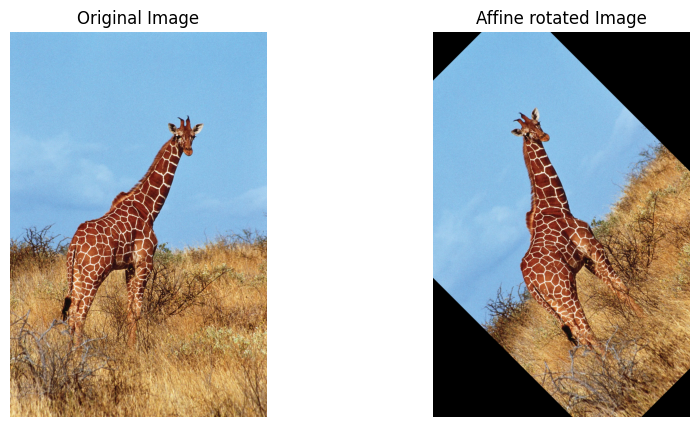

In [ ]:
angle = 45                      ## this is the angle at which we will rotate along the assigned centre
center = (cols//2, rows//2)     ## this is the center of rotation
scale = 1.0                     ## this is the scale factor

M = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title('Affine rotated Image')
plt.axis('off')

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

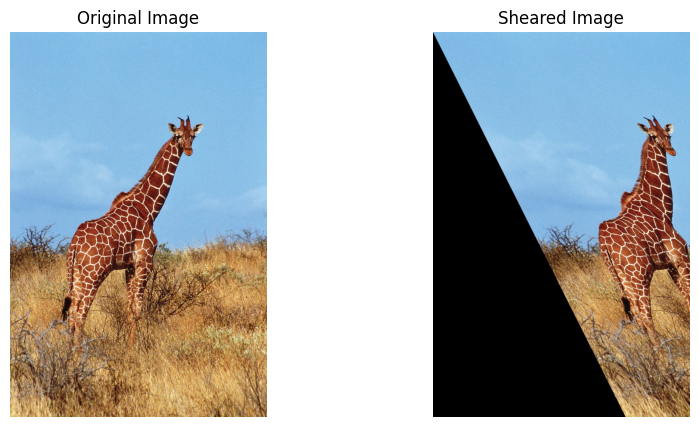

In [19]:
rows, cols, _ = image_rgb.shape
shear_X, shear_Y = 0.5,0

M = np.float32([[1,shear_X,0],
                [shear_Y,1,0]])

shear_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(shear_image)
plt.title("Sheared Image")
plt.axis("off")


# Translation

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

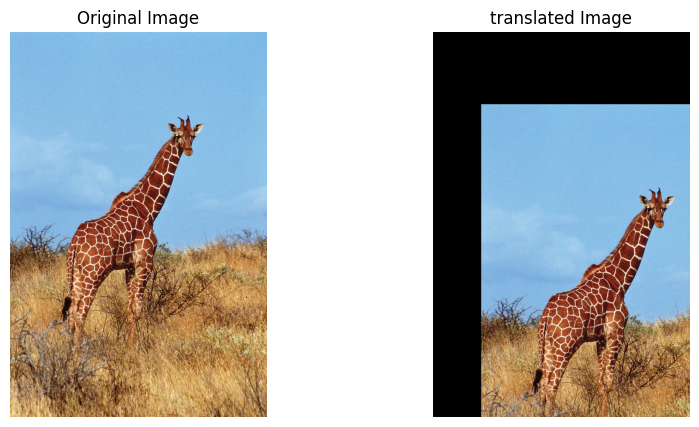

In [ ]:
rows, cols, _ = image_rgb.shape
tx, ty = 200, 300

M = np.float32([[1,0,tx],
                [0,1,ty]])

translated_image = cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("translated Image")
plt.axis("off")

